# HW3

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
#Read csv data into pandas DataFrame
url = 'https://raw.githubusercontent.com/FranktheTank123/UCB-MFE-python-preprogram/main/Lectures/Lecture%203/data/hw3.csv'
res = requests.get(url, allow_redirects=True)
with open('hw3.csv','wb') as file:
    file.write(res.content)
df = pd.read_csv('hw3.csv')
df

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,NaN,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,NaN,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,NaN,231.1080,234.5980,3.624890e+04,NaN,SOL,SOL
2664,2021-12-10 23:00:00,3.4600,3.4800,3.4100,3.4200,1.186261e+05,NaN,CRV,ETH
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,NaN,ETH,ETH


In [3]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


# Data Exploration

In [4]:
# get some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


we have 2667 total entries, but high, low and close have a bunch of nulls.

In [5]:
df.describe()

,open,high,low,close,volume,volumeUSD
count,2667.000000,2163.000000,2378.000000,2.531000e+03,2.667000e+03,0.0
mean,7064.250761,7009.354391,6963.685381,2.307774e+04,4.794219e+05,NaN
std,16866.246913,16878.982545,16683.896987,2.813898e+05,1.651197e+06,NaN
min,1.000200,1.000400,1.000200,1.000500e-02,6.717800e+01,NaN
25%,5.396500,5.052950,5.226625,5.341300e+00,1.324246e+03,NaN
50%,190.387000,192.373000,187.646000,1.900500e+02,1.886909e+04,NaN
75%,284.045000,284.160000,282.607500,1.706660e+03,1.059882e+05,NaN
max,58664.400000,58783.160000,58445.530000,5.688883e+06,3.282850e+07,NaN


The column high, low, close, and volumnUSD have null values.

In [6]:
df['chain'].value_counts()

ETH     1663
BTC      337
SOL      334
USDT     333
Name: chain, dtype: int64

In [7]:
df['token'].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

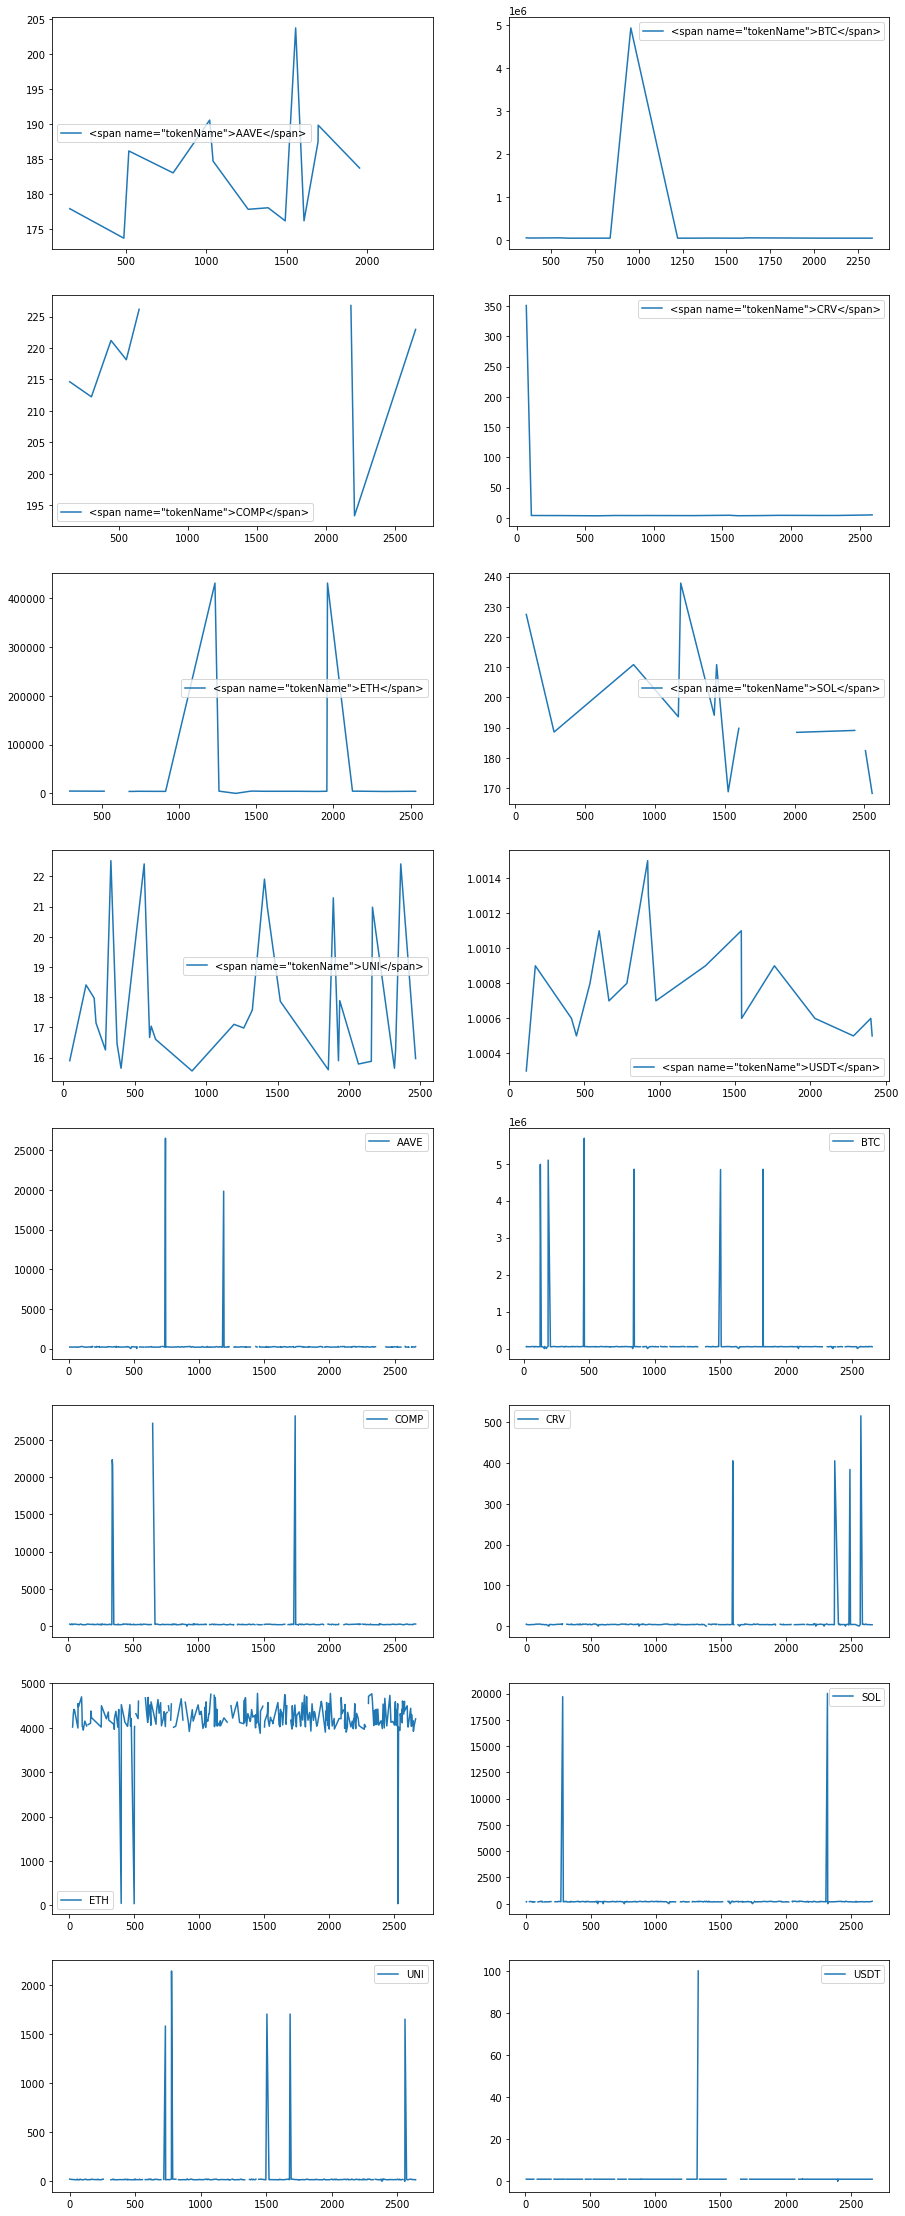

In [8]:
#Plot by token
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

# Data Cleaning

## Drop the duplicates

In [9]:
df.duplicated().sum()

307

We have some duplicated rows.

<AxesSubplot:>

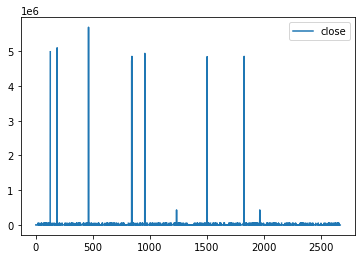

In [10]:
df[['token', 'close']].plot()

In [11]:
#Remove the duplicated rows
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()


0

## Rearrange the Duplicates

In [13]:
df['token'].value_counts()

COMP                                  286
BTC                                   283
SOL                                   281
AAVE                                  280
CRV                                   279
USDT                                  278
UNI                                   270
ETH                                   270
<span name="tokenName">UNI</span>      25
<span name="tokenName">ETH</span>      25
<span name="tokenName">USDT</span>     17
<span name="tokenName">CRV</span>      16
<span name="tokenName">AAVE</span>     15
<span name="tokenName">SOL</span>      14
<span name="tokenName">BTC</span>      12
<span name="tokenName">COMP</span>      9
Name: token, dtype: int64

In [14]:
df.loc[df.token.str.contains('</span>'), 'token'] = df.loc[df.token.str.contains('</span>'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>')[0]

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [15]:
df['token'].value_counts()

UNI     295
CRV     295
SOL     295
ETH     295
AAVE    295
USDT    295
COMP    295
BTC     295
Name: token, dtype: int64

## Dealing with missing values

In [16]:
df = df.sort_values(by = ['token', 'ts'], ascending=True, ignore_index = True)

In [17]:
df

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,257.1020,260.7750,255.3450,257.0780,2730.299,NaN,AAVE,ETH
1,2021-12-01 01:00:00,257.1490,266.2490,255.2700,264.8160,5752.541,NaN,AAVE,ETH
2,2021-12-01 02:00:00,264.7550,266.1870,262.5970,263.1250,1559.330,NaN,AAVE,ETH
3,2021-12-01 03:00:00,263.1840,NaN,NaN,266.2570,1647.398,NaN,AAVE,ETH
4,2021-12-01 04:00:00,266.3840,267.0240,264.2840,265.5020,829.993,NaN,AAVE,ETH
...,...,...,...,...,...,...,...,...,...
2355,2021-12-13 02:00:00,1.0005,NaN,1.0004,1.0004,7133859.470,NaN,USDT,USDT
2356,2021-12-13 03:00:00,1.0004,1.0006,1.0004,1.0006,4337884.530,NaN,USDT,USDT
2357,2021-12-13 04:00:00,1.0006,1.0006,1.0004,1.0006,2928892.910,NaN,USDT,USDT
2358,2021-12-13 05:00:00,1.0006,1.0006,1.0005,1.0006,2178755.170,NaN,USDT,USDT


The idea is to use the previous value of the same token to replace the null values of high and low missing values.

In [18]:
for token in df.token.unique():
    df.high[df.token==token] = df.high[df.token==token].fillna(method='ffill')
    df.high[df.token==token] = df.high[df.token==token].fillna(method='bfill')

/var/folders/zk/lgtjwggn577002d3wbsj3gmh0000gn/T/ipykernel_86631/4111554374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.high[df.token==token] = df.high[df.token==token].fillna(method='ffill')
/var/folders/zk/lgtjwggn577002d3wbsj3gmh0000gn/T/ipykernel_86631/4111554374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.high[df.token==token] = df.high[df.token==token].fillna(method='bfill')


In [19]:
df['high'].isnull().any()

False

In [20]:
for token in df.token.unique():
    df.low[df.token==token] = df.low[df.token==token].fillna(method='ffill')
    df.low[df.token==token] = df.low[df.token==token].fillna(method='bfill')

/var/folders/zk/lgtjwggn577002d3wbsj3gmh0000gn/T/ipykernel_86631/4130580235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.low[df.token==token] = df.low[df.token==token].fillna(method='ffill')
/var/folders/zk/lgtjwggn577002d3wbsj3gmh0000gn/T/ipykernel_86631/4130580235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.low[df.token==token] = df.low[df.token==token].fillna(method='bfill')


In [21]:
df['low'].isnull().any()

False

In [22]:
#Filling missing high and low with open since all open values are available
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

We call an outlier when close price is more or less than two times the open price.

In [23]:
#Use a heuristic for missing close price as average of high + low of the day
df_outlier = df.loc[(df.close / df.open >= 2)|(df.close / df.open <= 0.5)]

In [24]:
df_outlier

,ts,open,high,low,close,volume,volumeUSD,token,chain
11,2021-12-01 11:00:00,266.9360,267.9630,264.2370,2.650150e+04,1.018631e+03,NaN,AAVE,ETH
17,2021-12-01 17:00:00,265.2620,269.1060,262.9060,2.632300e+00,9.809190e+02,NaN,AAVE,ETH
32,2021-12-02 08:00:00,245.8090,247.5180,245.7290,2.467160e+00,3.166740e+02,NaN,AAVE,ETH
108,2021-12-05 12:00:00,198.8770,199.5750,196.7450,1.983240e+04,2.262924e+03,NaN,AAVE,ETH
342,2021-12-02 23:00:00,56904.6500,56952.8100,56639.4900,5.688883e+06,3.821792e+02,NaN,BTC,BTC
355,2021-12-03 12:00:00,56891.7000,57209.7000,56858.0200,5.703374e+02,1.897550e+02,NaN,BTC,BTC
375,2021-12-04 08:00:00,47711.3400,47869.7300,46750.0000,4.734782e+06,1.661132e+03,NaN,BTC,BTC
402,2021-12-05 11:00:00,49113.5500,49584.5100,48817.1500,4.936795e+06,6.211598e+02,NaN,BTC,BTC
446,2021-12-07 07:00:00,50941.5000,51272.8300,50936.0500,5.122500e+02,3.124719e+02,NaN,BTC,BTC
447,2021-12-07 08:00:00,51224.9900,51398.2600,50883.3400,5.097338e+06,4.433800e+02,NaN,BTC,BTC


In [25]:
df.loc[df_outlier.index, 'close'] = 0.5 * (df_outlier['high'] + df_outlier['low'])

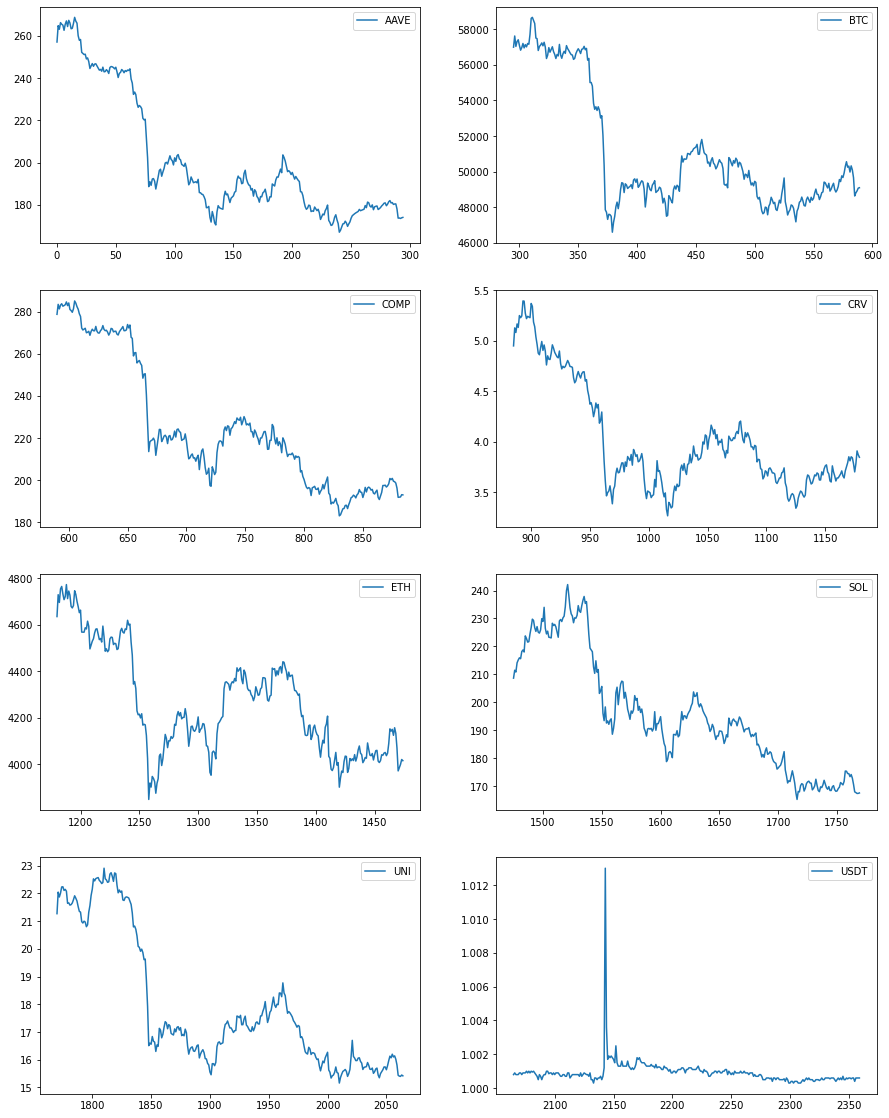

In [26]:
#Plot by token
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()  
    idx += 1

In [27]:
df[df.token=='ETH']

,ts,open,high,low,close,volume,volumeUSD,token,chain
1180,2021-12-01 00:00:00,4656.62,4672.43,4624.16,4634.95,6013.006735,NaN,ETH,ETH
1181,2021-12-01 01:00:00,4636.43,4736.90,4605.49,4729.10,13819.061610,NaN,ETH,ETH
1182,2021-12-01 02:00:00,4729.10,4729.10,4684.49,4695.78,7491.465440,NaN,ETH,ETH
1183,2021-12-01 03:00:00,4695.78,4729.10,4672.30,4754.09,10530.834423,NaN,ETH,ETH
1184,2021-12-01 04:00:00,4754.09,4774.74,4722.02,4764.59,12471.624735,NaN,ETH,ETH
...,...,...,...,...,...,...,...,...,...
1470,2021-12-13 02:00:00,4070.58,4070.58,3961.85,3970.92,18723.615566,NaN,ETH,ETH
1471,2021-12-13 03:00:00,3970.92,3999.90,3954.27,3984.29,8106.286351,NaN,ETH,ETH
1472,2021-12-13 04:00:00,3984.29,4012.00,3954.27,3998.87,4939.751497,NaN,ETH,ETH
1473,2021-12-13 05:00:00,3999.08,4023.92,3991.22,4020.10,3765.285201,NaN,ETH,ETH


Now we have a much cleaner dataset. Calculate missing volueUSD = volume * close

In [28]:
df.volumeUSD = df.volume * df.close

In [29]:
df.volumeUSD.isnull().any()

False

In [30]:
df.groupby('chain')['volumeUSD'].sum().to_frame()

,volumeUSD
chain,
BTC,1.095938e+10
ETH,1.365277e+10
SOL,4.076604e+09
USDT,1.008247e+09
